# Project: Wrangle Act

### Introduction 
This project is aimed at data wrangling processes (gathering, assessing and cleaning) of real world data to create interesting and accurate analysis for visualization. Three dataset was obtained from  from the Twitter account 'weratedogs'(@dog_ rates) which rates people's dogs with funny comments about the dogs. The three dataset that was gathered (Enhanced Twitter Archive, Image Predictions File, and Additional Data via the Twitter API), was later merged together to form one final DataFrame to analyze.

- Import all required python libraries
- Read twitter_archive_enhance.csv file into a dataframe called twitter
- Use Requests library to download the tweet image_prediction.tsv file and load into a dataframe called image
- Read the tweet_Json.txt file line by line into a dataframe with tweet_id, retweet_count and favorite_count


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import seaborn as sns

import os
import tweepy
import json
import re
import warnings
warnings.simplefilter('ignore')
import datetime

### Gathering Data

#### For this section, will gather all three pieces of data.
##### 1. The WeRateDogs Twitter archive
- I downloaded this file manually and Once it is downloaded, upload it and programmatically, read the data into a pandas DataFrame.

In [3]:
df_archive =pd.read_csv('twitter-archive-enhanced.csv', parse_dates=['timestamp'])

##### 2. image_predictions_file
- This file (image_predictions.tsv) is present in each tweet according to a neural network. It is hosted on Udacity's servers and will be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

In [ ]:
folder_name = 'Twitter_archive'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

- To save the 'response' file in our CPU, I need to open a file (located after the last slash in the url) and i will use the python split function to get everything located in the last slash

In [ ]:
with open(os.path.join(folder_name, url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)
    os.listdir(folder_name)

In [3]:
df_tsv = pd.read_csv('image-predictions.tsv', sep = '\t')

##### 3. Additional data from the Twitter API

This third dataset will be downloaded programmatically from twitter's API using tweepy, then saved to a JSON file, stored in an empty list, then loaded into a pandas DataFrame.

In [ ]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, parser=tweepy.parsers.JSONParser(), wait_on_rate_limit=True)

tweet_ids = df_archive["tweet_id"]

In [ ]:
# Download Tweepy status object based on Tweet ID and store in list
list_of_tweets = []
# Tweets that can't be found are saved in the list below:
cant_find_tweets_for_those_ids = []
for t_id in tweet_ids:   
    try:
        list_of_tweets.append(api.get_status(t_id, tweet_mode='extended'))
    except Exception as e:
        cant_find_tweets_for_those_ids.append(t_id)

In [ ]:
print("The list of tweets" ,len(list_of_tweets))
print("The list of tweets no found" , len(cant_find_tweets_for_those_ids))

In [ ]:
# Then in this code block we isolate the json part of each tweepy 
# status object that we have downloaded and we add them all into a list.
my_list_of_dicts = []
for each_json_tweet in list_of_tweets:
    my_list_of_dicts.append(each_json_tweet)

In [ ]:
# save this list into a txt file in CPU:
with open('tweet_json.txt', 'w') as file:
        file.write(json.dumps(my_list_of_dicts, indent=4))

In [4]:
#create an empty list, then reading the tweet_json.txt file line by line.

my_new_list = []
with open('tweet_json.txt', encoding='utf-8') as json_file:  
    all_data = json.load(json_file)
    for each_line in all_data:
        tweet_id = each_line['id']
        create_date = each_line['created_at']
        favorite_count = each_line['favorite_count']
        retweet_count = each_line['retweet_count']
        
#joinig it to an empty list(my_new_list) and creating a Pandas DataFrame with tweet_id, retweet_count and favorite_count
        my_new_list.append({'tweet_id': int(tweet_id),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                             'create_date' : create_date,})
        df_json = pd.DataFrame(my_new_list, columns = ['tweet_id', 'favorite_count','retweet_count', 'create_date'])

# 

### Assessing Data

In this section, data assessment will be conducted, to check for data quality and tidiness issues. all three dataset will be assessed visually and programmatically.


#### visual assessment

In [5]:
#loading twitter_archive dataframe to visually assess it
df_archive.head(50)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [6]:
# load image_predictions_file for visual assessment
df_tsv.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [7]:
# load df_json for visual assessment

df_json.head()

,tweet_id,favorite_count,retweet_count,create_date
0,892420643555336193,33728,6981,Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,29261,5282,Tue Aug 01 00:17:27 +0000 2017
2,891815181378084864,21993,3468,Mon Jul 31 00:18:03 +0000 2017
3,891689557279858688,36838,7203,Sun Jul 30 15:58:51 +0000 2017
4,891327558926688256,35223,7725,Sat Jul 29 16:00:24 +0000 2017


# 

#### Programmatical Assessment

#### programmatically assessing the df_archive file

In [8]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

In [9]:
# checking for duplicated tweet_id
df_archive[df_archive.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [10]:
# checking for any duplicates in text
df_archive[df_archive.text.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [11]:
# checking for where rating_ does not equal 10
df_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [12]:
df_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [13]:
# checking for any input error
one = df_archive['doggo'].value_counts()
two = df_archive['floofer'].value_counts()
three = df_archive['pupper'].value_counts()
four = df_archive['puppo'].value_counts()
print(one)
print(two)
print(three)
print(four)

None     2259
doggo      97
Name: doggo, dtype: int64
None       2346
floofer      10
Name: floofer, dtype: int64
None      2099
pupper     257
Name: pupper, dtype: int64
None     2326
puppo      30
Name: puppo, dtype: int64


#### programmatically assessing the image prediction dataframe

In [14]:
df_tsv.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [15]:
df_tsv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [16]:
# checking if there is any other input other than True or False
df_tsv['p1_dog'].value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [17]:
df_tsv['p2_dog'].value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [18]:
df_tsv['p3_dog'].value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [19]:
#df_tsv[df_tsv['jpg_url'].duplicated()]
ids = df_tsv["jpg_url"]
df_tsv[ids.isin(ids[ids.duplicated()])].sort_values("jpg_url")

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
480,675354435921575936,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1864,842892208864923648,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
1641,807106840509214720,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
1703,817181837579653120,https://pbs.twimg.com/ext_tw_video_thumb/81596...,1,Tibetan_mastiff,0.506312,True,Tibetan_terrier,0.295690,True,otterhound,0.036251,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1992,873697596434513921,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
2051,887473957103951883,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197,True,Rhodesian_ridgeback,0.054950,True,beagle,0.038915,True
2055,888202515573088257,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197,True,Rhodesian_ridgeback,0.054950,True,beagle,0.038915,True
1033,711694788429553666,https://pbs.twimg.com/tweet_video_thumb/CeBym7...,1,brown_bear,0.713293,False,Indian_elephant,0.172844,False,water_buffalo,0.038902,False


In [20]:
# check for duplicates in expanded_urls column
ids = df_archive["expanded_urls"]
df_archive[ids.isin(ids[ids.duplicated()])].sort_values("expanded_urls")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
349,831650051525054464,NaN,NaN,2017-02-14 23:43:18+00:00,"<a href=""http://twitter.com/download/iphone"" r...","I usually only share these on Friday's, but th...",NaN,NaN,NaN,"http://www.gofundme.com/bluethewhitehusky,http...",13,10,None,None,None,None,None
204,852936405516943360,NaN,NaN,2017-04-14 17:27:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: I usually only share these on F...,8.316501e+17,4.196984e+09,2017-02-14 23:43:18 +0000,"http://www.gofundme.com/bluethewhitehusky,http...",13,10,None,None,None,None,None
2338,666104133288665088,NaN,NaN,2015-11-16 04:02:55+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Not familiar with this breed. No tail (weird)....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666104133...,1,10,None,None,None,None,None
605,798576900688019456,NaN,NaN,2016-11-15 17:22:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Not familiar with this breed. N...,6.661041e+17,4.196984e+09,2015-11-16 04:02:55 +0000,https://twitter.com/dog_rates/status/666104133...,1,10,None,None,None,None,None
2294,667138269671505920,NaN,NaN,2015-11-19 00:32:12+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Extremely intelligent dog here. Has learned to...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1940,673716320723169284,6.737159e+17,4.196984e+09,2015-12-07 04:11:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",The millennials have spoken and we've decided ...,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
2038,671550332464455680,6.715449e+17,4.196984e+09,2015-12-01 04:44:10+00:00,"<a href=""http://twitter.com/download/iphone"" r...",After 22 minutes of careful deliberation this ...,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
2149,669684865554620416,6.693544e+17,4.196984e+09,2015-11-26 01:11:28+00:00,"<a href=""http://twitter.com/download/iphone"" r...",After countless hours of research and hundreds...,NaN,NaN,NaN,NaN,11,10,None,None,None,None,None
2189,668967877119254528,6.689207e+17,2.143566e+07,2015-11-24 01:42:25+00:00,"<a href=""http://twitter.com/download/iphone"" r...",12/10 good shit Bubka\n@wane15,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None


#### programmatically assessing the df_twitter table

In [21]:
df_json.head()

,tweet_id,favorite_count,retweet_count,create_date
0,892420643555336193,33728,6981,Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,29261,5282,Tue Aug 01 00:17:27 +0000 2017
2,891815181378084864,21993,3468,Mon Jul 31 00:18:03 +0000 2017
3,891689557279858688,36838,7203,Sun Jul 30 15:58:51 +0000 2017
4,891327558926688256,35223,7725,Sat Jul 29 16:00:24 +0000 2017


In [22]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2327 non-null   int64 
 1   favorite_count  2327 non-null   int64 
 2   retweet_count   2327 non-null   int64 
 3   create_date     2327 non-null   object
dtypes: int64(3), object(1)
memory usage: 72.8+ KB


In [23]:
df_json.describe()

,tweet_id,favorite_count,retweet_count
count,2.327000e+03,2327.000000,2327.000000
mean,7.417930e+17,7035.722819,2462.232918
std,6.820795e+16,10933.649880,4170.050521
min,6.660209e+17,0.000000,1.000000
25%,6.781394e+17,1220.500000,493.000000
50%,7.178418e+17,3042.000000,1147.000000
75%,7.986547e+17,8577.500000,2848.000000
max,8.924206e+17,144456.000000,70455.000000


In [24]:
# Check for duplicates
df_json.duplicated().sum()

0

# 
#### Quality issues

##### df_archive table
- The following columns ('name', 'doggo', 'floofer', 'puper', 'puppo') all had their empty cell filled as None instead NaN.
- Dog Name column have invalid names like 'None', 'quite', 'such', 'the 'a', 'an'.
- Erroneous datatypes
- Some rating_denominator are not equal to 10.
- Invalid values found in rating_numerators columns.
- duplicated values found in expanded_urls column.
- Reduce breed Predictions columns to two column only (dog_type and confidence_level).
- Some data are retweets but we only want to keep “original tweets”, no “retweets”.
- Reply tweets are not “original tweets” either.
- Delete columns not needed for analysis.

##### df_tsv table
- Duplicates rows exists(some rows have duplicates in every column except the tweet_id column)
##### df_jason
- drop Create_date column.


#### Tidiness issues
- Dog stages (doggo, floofer, pupper, puppo) are spread in different columns.
- Create_date exists already in df_archive, we need it in only one of the dataset.
- Merge all three dataset to one table
# 


### Cleaning Data 

#### create copies of datasets

In [25]:
# Make copies of datasets
df_archive_clean = df_archive.copy()
df_tsv_clean = df_tsv.copy()
df_json_clean = df_json.copy()

### df_archive

##### The following columns ('name', 'doggo', 'floofer', 'puper', 'puppo') all had their empty cell filled as None instead NaN.
- Replace all None values with NaN in df_archive columns ('name', 'doggo', 'floofer', 'puper', 'puppo')

#### code

In [26]:
# using .replce() function to fix empty cells
df_archive_clean['name'].replace('None', np.NAN, inplace =True)
df_archive_clean['doggo'].replace('None', np.NAN, inplace =True)
df_archive_clean['floofer'].replace('None', np.NAN, inplace =True)
df_archive_clean['pupper'].replace('None', np.NAN, inplace =True)
df_archive_clean['puppo'].replace('None', np.NAN, inplace =True)

#### test

In [27]:
# to check if any column still has 'None' as a value
df_archive_clean[df_archive_clean['name'] == 'None']
df_archive_clean[df_archive_clean['floofer'] == 'None']
df_archive_clean[df_archive_clean['pupper'] == 'None']
df_archive_clean[df_archive_clean['puppo'] == 'None']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


# 
##### Dog Name column have invalid names like 'None', 'quite', 'such', 'the', 'a', 'an'.
- convert invalid names to a null cell
#### code

In [28]:
df_archive_clean['name'].replace('such', np.NAN, inplace =True)
df_archive_clean['name'].replace('a', np.NAN, inplace =True)
df_archive_clean['name'].replace('an', np.NAN, inplace =True)
df_archive_clean['name'].replace('the', np.NAN, inplace =True)
df_archive_clean['name'].replace('quite', np.NAN, inplace =True)

#### test

In [29]:
df_archive_clean[df_archive_clean['name'].isin(['quite', 'such', 'the', 'a', 'an'])]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


# 
##### Erroneous datatype (Timestamp and float)
- Convert timestamp column from object datatype to datetime.

#### code

In [30]:
df_archive_clean['timestamp']= pd.to_datetime(df_archive_clean['timestamp'])

In [31]:
df_archive_clean['rating_numerator'] = df_archive_clean['rating_numerator'].astype(float)

#### test

In [32]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   float64         

# 
##### Some rating_denominator other than 10
- make all rating_denominator values to be equal to 10

#### code

In [33]:
# make all rating_denominator = 10
df_archive_clean['rating_denominator'] = df_archive_clean['rating_denominator'] = 10

#### test

In [34]:
df_archive_clean['rating_denominator'].value_counts()

10    2356
Name: rating_denominator, dtype: int64

# 
##### Invalid values found in rating_numerators columns.
- Will use several methods such as extractall(), query(), contains(), etc to check for errors of the ratings. 
- Save the index of rrecords with double ratkings and then drop them.

#### code

In [35]:
# using contain to check text where ratings can be a float.
pd.set_option('display.max_colwidth', None)
df_archive_clean[df_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

,text,rating_numerator
45,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5.0
340,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75.0
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75.0
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27.0
1689,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5.0
1712,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26.0


In [36]:
# fixing results manually
df_archive_clean.iloc[45, 10] = 13.5
df_archive_clean.iloc[340, 10] = 9.75
df_archive_clean.iloc[695, 10] = 9.75
df_archive_clean.iloc[763, 10] = 11.27
df_archive_clean.iloc[1689, 10] = 9.5
df_archive_clean.iloc[1712, 10] = 11.26

#### test

In [37]:
df_archive_clean.iloc[[45, 340, 695, 763, 1689, 1712], [10, 11]]

,rating_numerator,rating_denominator
45,13.50,10
340,9.75,10
695,9.75,10
763,11.27,10
1689,9.50,10
1712,11.26,10


In [38]:
hyphen_table = df_archive_clean.text.str.extractall(r"(\d+\d*\/\d+)")
hyphen_table.head(10)

,,0
,match,
0,0,13/10
1,0,13/10
2,0,12/10
3,0,13/10
4,0,12/10
5,0,13/10
6,0,13/10
7,0,13/10
8,0,13/10


In [39]:
match_1 = hyphen_table.query("match == 1")
match_1.head()

,,0
,match,
55,1,13/10
313,1,13/10
561,1,11/10
766,1,11/10
784,1,14/10


In [40]:
match_1.index

MultiIndex([(  55, 1),
            ( 313, 1),
            ( 561, 1),
            ( 766, 1),
            ( 784, 1),
            ( 860, 1),
            (1007, 1),
            (1068, 1),
            (1165, 1),
            (1202, 1),
            (1222, 1),
            (1359, 1),
            (1459, 1),
            (1465, 1),
            (1508, 1),
            (1525, 1),
            (1538, 1),
            (1662, 1),
            (1795, 1),
            (1832, 1),
            (1897, 1),
            (1901, 1),
            (1970, 1),
            (2010, 1),
            (2064, 1),
            (2113, 1),
            (2177, 1),
            (2216, 1),
            (2263, 1),
            (2272, 1),
            (2298, 1),
            (2306, 1),
            (2335, 1)],
           names=[None, 'match'])

In [41]:
df_archive_clean.iloc[[55, 313, 561, 766, 784, 860, 1007, 1068, 1165, 1202, 
                    1222, 1359, 1459, 1465, 1508, 1525, 1538, 1662, 1795, 
                    1832, 1897, 1901, 1970, 2010, 2064, 2113, 2177, 2216,
                    2263, 2272, 2298, 2298, 2306, 2335], [5, 10, 11]]

,text,rating_numerator,rating_denominator
55,@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,17.0,10
313,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960.0,10
561,"RT @dog_rates: ""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",12.0,10
766,"""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",12.0,10
784,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",9.0,10
860,RT @dog_rates: Meet Eve. She's a raging alcoholic 8/10 (would b 11/10 but pupper alcoholism is a tragic issue that I can't condone) https:/…,8.0,10
1007,This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ,10.0,10
1068,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9.0,10
1165,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4.0,10
1202,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50.0,10


In [42]:
# rating confused an emotional impulse rating
df_archive_clean.iloc[55, 10] = 13

# 960/00 isn't a valid rating
df_archive_clean.iloc[313, 10] = 13

# rating confused with 9/11(September 11th)
df_archive_clean.iloc[784, 10] = 14

# rating confused with 9/11(September 11th)
df_archive_clean.iloc[1068, 10] = 14

df_archive_clean.iloc[1202, 10] = 11
df_archive_clean.iloc[1459, 10] = 13
df_archive_clean.iloc[2335, 10] = 9

#### test

In [43]:
df_archive_clean.iloc[[55, 313, 784, 1068, 1202, 1459, 2335], [10, 11]]

,rating_numerator,rating_denominator
55,13.0,10
313,13.0,10
784,14.0,10
1068,14.0,10
1202,11.0,10
1459,13.0,10
2335,9.0,10


In [44]:
# save the index of records with double ratings
double_rating = df_archive_clean.iloc[[561, 766, 860, 1007, 1165, 1222, 1359, 1465, 1508, 1525, 1538, 1662, 1795, 
                    1832, 1897, 1901, 1970, 2010, 2064, 2113, 2177, 2216,
                    2263, 2272, 2298, 2298, 2306]]
double_ratings = double_rating.index

In [45]:
# drop records with double ratings
df_archive_clean.drop(axis='index', index=double_ratings, inplace=True)

In [46]:
# collect index of records where 'rating_numerator' is higher than 14
df_archive_clean[df_archive_clean['rating_numerator'] >=15].index
high_ratings = df_archive_clean[df_archive_clean['rating_numerator'] >=15].index

# drop high_ratings
df_archive_clean.drop(axis='index', index=high_ratings, inplace=True)

# 
##### duplicated values found in expanded_urls column
- remove the duplicates
#### code

In [47]:
# code to delete duplicates
df_archive_clean.drop_duplicates(subset= 'expanded_urls', inplace = True)

#### test

In [48]:
sum(df_archive_clean.expanded_urls.duplicated())

0

# 
#####  doggo, floofer, pupper, puppo should be in one column.
- Create a new column called 'dog_class' and use the apply method to join values from 'doggo', 'floofer', 'pupper', 'puppo' 'into dog_class'
#### code

In [49]:
# join values from different columns to one column
df_archive_clean['dog_class'] = df_archive_clean[['doggo', 'floofer', 'pupper', 
                                                  'puppo']].apply(lambda x: ','.join(x[x.notnull()]),axis=1)

In [50]:
# get rid of the space by replacing it with null value
df_archive_clean.replace(r'^\s*$', np.nan, regex=True, inplace=True)

In [51]:
# delete unwanted columns
df_archive_clean.drop(['puppo','pupper','floofer','doggo'], axis=1, inplace=True)

#### test

In [52]:
df_archive_clean.head(201)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_class
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10,Archie,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10,Darla,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10,Franklin,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,851464819735769094,NaN,NaN,2017-04-10 16:00:07+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Iggy. He was a rescue dog killed in the Stockholm attack. His memorial started with a collar and four bones. It's grown a bit. 14/10 https://t.co/E4a0R9my1M,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/851464819735769094/photo/1,https://twitter.com/dog_rates/status/851464819735769094/photo/1,https://twitter.com/dog_rates/status/851464819735769094/photo/1,https://twitter.com/dog_rates/status/851464819735769094/photo/1",14.0,10,Iggy,NaN
215,851224888060895234,NaN,NaN,2017-04-10 00:06:42+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Snoop. His number one passion is sticking his head out of car windows, so he purchased some doggles. Stylish af. 13/10 happy travels https://t.co/iHYfZdz444",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/851224888060895234/photo/1,https://twitter.com/dog_rates/status/851224888060895234/photo/1,https://twitter.com/dog_rates/status/851224888060895234/photo/1,https://twitter.com/dog_rates/status/851224888060895234/photo/1",13.0,10,Snoop,NaN
216,850753642995093505,NaN,NaN,2017-04-08 16:54:09+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Kyle. He made a joke about your shoes, then stuck his tongue out at you. Uncalled for. Step the h*ck up Kyle. 11/10 would forgive https://t.co/hLQ2Ilg2uN",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/850753642995093505/photo/1,https://twitter.com/dog_rates/status/850753642995093505/photo/1",11.0,10,Kyle,NaN
217,850380195714523136,NaN,NaN,2017-04-07 16:10:12+00:00,"<a href=""http://twitter.com/download/iphone"" rel="

##### Some data are retweets but we only want to keep “original tweets”, no “retweets”
- drop retweet records
#### code

In [53]:
df_archive_clean = df_archive_clean[df_archive_clean.retweeted_status_id.isnull()]
df_archive_clean = df_archive_clean[df_archive_clean.retweeted_status_user_id.isnull()]
df_archive_clean = df_archive_clean[df_archive_clean.retweeted_status_timestamp.isnull()]

#### test

In [54]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2002 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2002 non-null   int64              
 1   in_reply_to_status_id       23 non-null     float64            
 2   in_reply_to_user_id         23 non-null     float64            
 3   timestamp                   2002 non-null   datetime64[ns, UTC]
 4   source                      2002 non-null   object             
 5   text                        2002 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2001 non-null   object             
 10  rating_numerator            2002 non-null   float64         

##### Reply tweets are not “original tweets” either
- drop reply tweets records

In [55]:
df_archive_clean = df_archive_clean[df_archive_clean.in_reply_to_status_id.isnull()]
df_archive_clean = df_archive_clean[df_archive_clean.in_reply_to_user_id.isnull()]

#### tsst

In [56]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1979 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1979 non-null   int64              
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   1979 non-null   datetime64[ns, UTC]
 4   source                      1979 non-null   object             
 5   text                        1979 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               1979 non-null   object             
 10  rating_numerator            1979 non-null   float64         

##### Delete columns not needed for analysis.
- using the drop() function to delete columns that will not be needed for aanalysis.

#### code

In [57]:
#get the column names of twitter_archive_clean

#CODE: Delete columns no needed
df_archive_clean = df_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 
                                  'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls'], 1)

#### test

In [58]:
list(df_archive_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dog_class']

### df_tsv (image preduction file)


##### duplicates rows exists
- drop duplicates rows
#### code

In [59]:
df_tsv_clean.drop_duplicates(subset='jpg_url', keep='first', inplace=True)

#### test

In [60]:
df_tsv_clean[df_tsv_clean['jpg_url'].duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


##### Reduce breed Predictions columns to two column only (dog_type and confidence_level)

#### code

In [61]:
# conditions for selecting dog
condition = [(df_tsv_clean['p1_dog'] == True),
              (df_tsv_clean['p2_dog'] == True),
              (df_tsv_clean['p3_dog'] == True)]

# table to pick dog_type if conditions are met
dog_types = [df_tsv_clean['p1'], 
        df_tsv_clean['p2'],
        df_tsv_clean['p3']]

# table to pick confidence_level if conditions are met
confidence = [df_tsv_clean['p1_conf'], 
                    df_tsv_clean['p2_conf'], 
                    df_tsv_clean['p3_conf']]

# selecting the predicted dog breed based on the first successful condition and placing in new dog_type column
df_tsv_clean['dog_type'] = np.select(condition, dog_types, 
                                       default = 'null')

# selecting the predicted confidence based on the first successful condition and placing into new confidence_level column
df_tsv_clean['confidence_level'] = np.select(condition, confidence, 
                                            default = 0)


In [62]:
#ddeleting the previous prediction and confidence level columns
df_tsv_clean.drop(df_tsv_clean.iloc[:,3:12], inplace = True, axis = 1)

In [63]:
# get rid of the rows with any empty value 
df_tsv_clean = df_tsv_clean[df_tsv_clean['dog_type'] != 'null']

#### test

In [64]:
df_tsv_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2073
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tweet_id          1691 non-null   int64  
 1   jpg_url           1691 non-null   object 
 2   img_num           1691 non-null   int64  
 3   dog_type          1691 non-null   object 
 4   confidence_level  1691 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 79.3+ KB


### df_json
##### Drop Create_date column
- create_date already exist in one of the dataset.
#### code

In [65]:
# use the drop function to delete create_date column.
df_json_clean= df_json_clean.drop('create_date', 1)

#### test

In [66]:
df_json_clean.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,33728,6981
1,892177421306343426,29261,5282
2,891815181378084864,21993,3468
3,891689557279858688,36838,7203
4,891327558926688256,35223,7725


##### Merge all three dataset to one table
- Merge df_archive_clean, df_tsv_clean and df_json_clean dataframes together and cleaning it
#### code

In [67]:
# merging datasets into one
weratedogs_clean = pd.merge(pd.merge(df_archive_clean, df_tsv_clean, how = 'inner', on ='tweet_id'),
                            df_json_clean, how ='inner', on = 'tweet_id')

In [68]:
#clean source
weratedogs_clean['source']= weratedogs_clean['source'].apply(lambda x:
                                                                      re.findall(r'>(.*)<',x)[0])

In [69]:
#create rating column by joining the values of both rating_numerator and rating_denominator columns together
weratedogs_clean['rating'] = weratedogs_clean['rating_numerator'].astype(str) + '/'+ weratedogs_clean['rating_denominator'].astype(str)

# drop columns that are not needed
weratedogs_clean.drop(['rating_numerator', 'rating_denominator'], axis = 1, inplace= True)

#### test

In [70]:
weratedogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1560 entries, 0 to 1559
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   tweet_id          1560 non-null   int64              
 1   timestamp         1560 non-null   datetime64[ns, UTC]
 2   source            1560 non-null   object             
 3   text              1560 non-null   object             
 4   name              1136 non-null   object             
 5   dog_class         241 non-null    object             
 6   jpg_url           1560 non-null   object             
 7   img_num           1560 non-null   int64              
 8   dog_type          1560 non-null   object             
 9   confidence_level  1560 non-null   float64            
 10  favorite_count    1560 non-null   int64              
 11  retweet_count     1560 non-null   int64              
 12  rating            1560 non-null   object             
dtypes: 

In [71]:
weratedogs_clean.sample(2)

,tweet_id,timestamp,source,text,name,dog_class,jpg_url,img_num,dog_type,confidence_level,favorite_count,retweet_count,rating
241,825535076884762624,2017-01-29 02:44:34+00:00,Twitter for iPhone,Here's a very loving and accepting puppo. Appears to have read her Constitution well. 14/10 would pat head approvingly https://t.co/6ao80wIpV1,NaN,puppo,https://pbs.twimg.com/media/C3TjvitXAAAI-QH.jpg,1,Rottweiler,0.681495,53865,16320,14.0/10
489,770293558247038976,2016-08-29 16:14:30+00:00,Twitter for iPhone,This is Jackson. There's nothing abnormal about him. Just your average really good dog. 10/10 https://t.co/3fEPpj0KYw,Jackson,NaN,https://pbs.twimg.com/media/CrCh5RgW8AAXW4U.jpg,1,Italian_greyhound,0.931668,5841,1352,10.0/10


# 
### Storing Data
- Save cleaned dataset to a CSV file named "twitter_weratedogs.csv".

In [72]:
weratedogs_clean.to_csv("twitter_weratedogs.csv", index= False)

# 
### Analysis and Visualization of Data
- What is the most popular dog type?
- What is the most popular dog stage?
- most used device for tweeting (source)
- Dogs ratings to retweet counts
- correlation between retweet count and favorite count?


In [73]:
# make a copy of weratedogs_clean
df = weratedogs_clean.copy()

- In order to gather some time series analysis, we need to take the DataFrame and set the index to the timestamp column . 

In [74]:
#setting the DataFrame to index the timestamp column
df = df.set_index('timestamp')

#### the most popular dog type?


In [98]:
# the most common dog_type
df.dog_type.value_counts()

golden_retriever      146
Labrador_retriever     96
Pembroke               90
Chihuahua              85
pug                    62
                     ... 
Scotch_terrier          1
EntleBucher             1
Japanese_spaniel        1
standard_schnauzer      1
Irish_wolfhound         1
Name: dog_type, Length: 113, dtype: int64

##### visualization

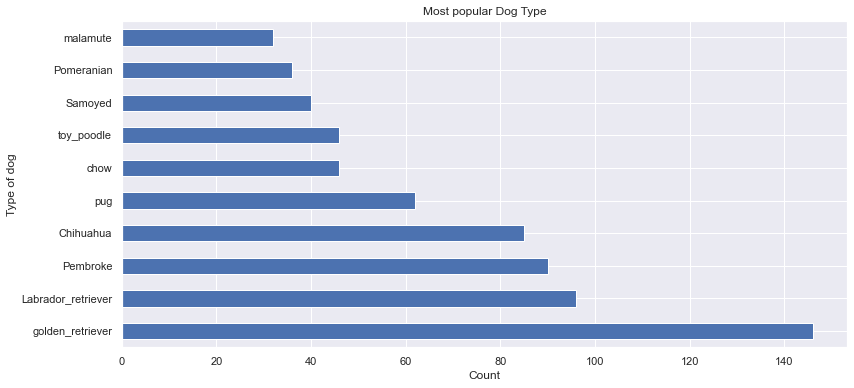

In [86]:
df_dog_type = df.groupby('dog_type').filter(lambda x: len(x) >= 25)

df_dog_type['dog_type'].value_counts().head(10).plot(kind = 'barh')
plt.title('Most popular Dog Type')
plt.xlabel('Count')
plt.ylabel('Type of dog')

fig = plt.gcf() 
fig.savefig('output1.png',bbox_inches='tight');

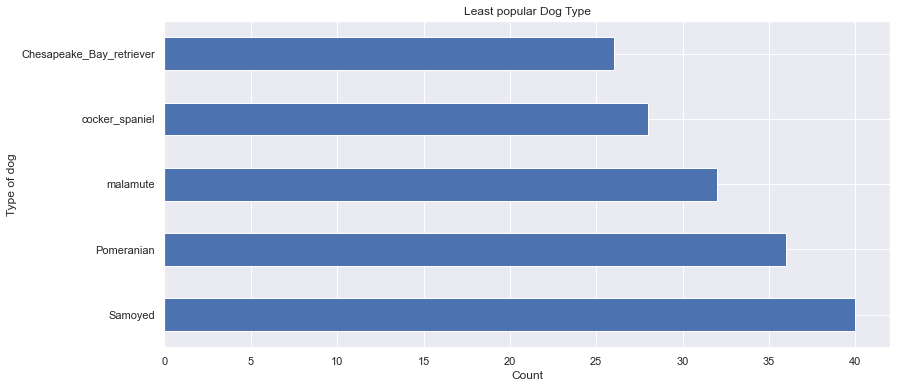

In [99]:
f_dog_type = df.groupby('dog_type').filter(lambda x: len(x) >= 25)

df_dog_type['dog_type'].value_counts().tail(5).plot(kind = 'barh')
plt.title('Least popular Dog Type')
plt.xlabel('Count')
plt.ylabel('Type of dog')

fig = plt.gcf() 
fig.savefig('output2.png',bbox_inches='tight');

####  the most popular dog_class?

In [88]:
df.dog_class.value_counts()

pupper           155
doggo             51
puppo             19
floofer            7
doggo,pupper       7
doggo,puppo        1
doggo,floofer      1
Name: dog_class, dtype: int64

##### visualization

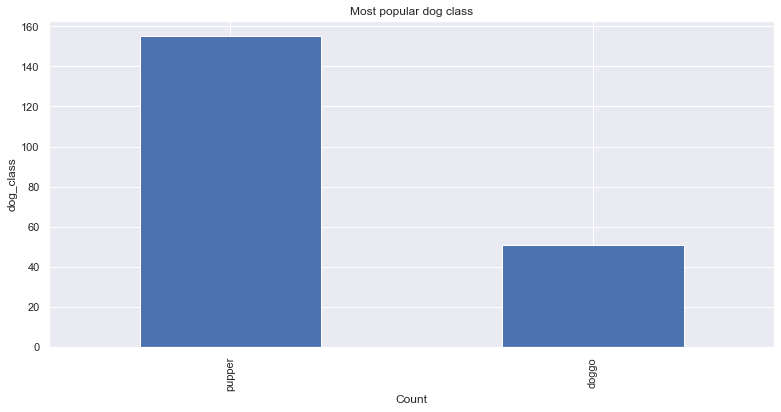

In [100]:
# plotting a bar chart
df_stage = df.groupby('dog_class').filter(lambda x: len(x) >= 25)

df_stage['dog_class'].value_counts().head(10).plot(kind = 'bar')
plt.title('Most popular dog class')
plt.xlabel('Count')
plt.ylabel('dog_class')

fig = plt.gcf() 
fig.savefig('output3.png',bbox_inches='tight');

##### most used device for tweeting (source)

In [80]:
df.source.value_counts()

Twitter for iPhone    1532
Twitter Web Client      20
TweetDeck                8
Name: source, dtype: int64

##### Dogs ratings to retweet counts

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


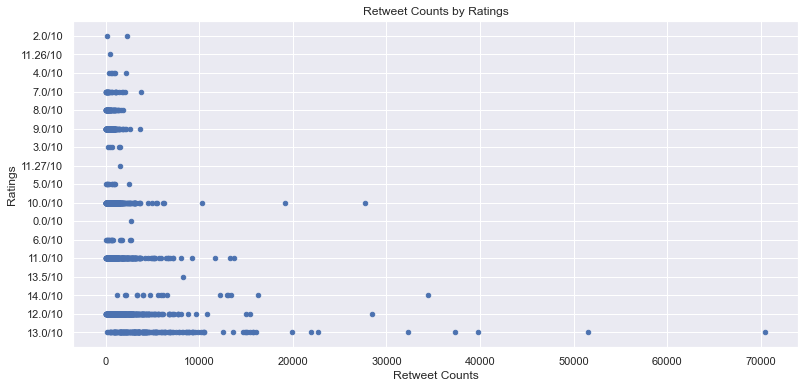

In [101]:
df.plot(x='retweet_count', y='rating', kind='scatter')
plt.xlabel('Retweet Counts')
plt.ylabel('Ratings')
plt.title('Retweet Counts by Ratings')

fig = plt.gcf()
fig.savefig('output4.png',bbox_inches='tight');

#####  correlation between retweet count and favorite count?

The Correlation Between favorite counts And retweet counts is  0.927053319507625


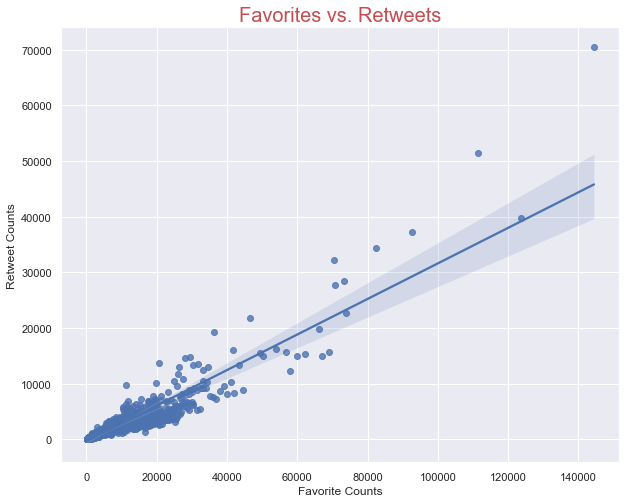

In [102]:
sns.set(rc={'figure.figsize':(10,8)})
sns.regplot(x='favorite_count', y='retweet_count', data = df)

plt.title("Favorites vs. Retweets",color="r", size=20)
plt.ylabel("Retweet Counts", size=12)
plt.xlabel("Favorite Counts", size=12);

df_corr = df.corr()

print("The Correlation Between favorite counts And retweet counts is ",df_corr.loc['favorite_count','retweet_count']);

fig = plt.gcf() 
fig.savefig('output5.png',bbox_inches='tight');

In [103]:
retweet = df['retweet_count'].resample('1w').mean()
favorite = df['favorite_count'].resample('1w').mean()

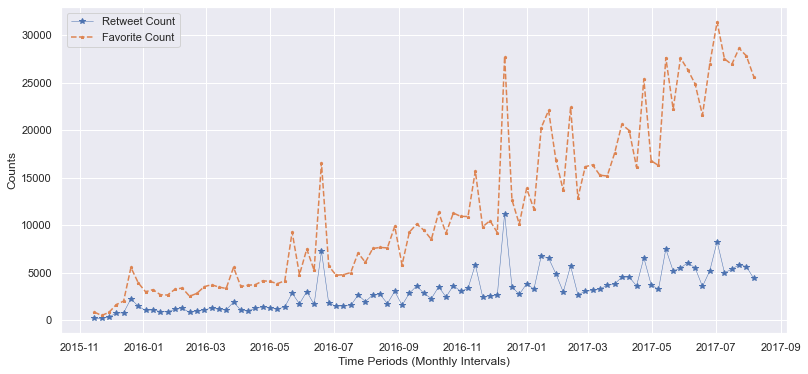

In [104]:
# plotting the weekly graph of favorite and retweet counts to show display over time.
sns.set(rc={'figure.figsize':(13, 6)})
fig, ax = plt.subplots()
ax.plot(retweet, marker='*', linestyle='-', linewidth=0.5, label='Retweet Count')
ax.plot(favorite, marker='*', markersize=3, linestyle='--', label='Favorite Count')
ax.set_ylabel('Counts')
ax.set_xlabel('Time Periods (Monthly Intervals)')
ax.legend();

fig = plt.gcf() 
fig.savefig('output.png',bbox_inches='tight');

fig = plt.gcf() 
fig.savefig('output6.png',bbox_inches='tight');